In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\user\Downloads\HubSpot - 1 (2).csv')

# Remove missing values
df.dropna(inplace=True)
print("Shape of the DataFrame after dropping NAs:", df.shape)
df.drop('Activity', axis=1, inplace=True)

# List of columns to dummy encode
columns_to_encode = ['Industry', 'Location', 'Size of the Company', 'JOB Position', 'Accroche']

# Dummy encode the columns
df = pd.get_dummies(df, columns=columns_to_encode)

# Columns to map binary values
varlist = ['Opportunity Status', 'Certification', 'Website / Link', 'Linkedin Page']

# Define the map function
def binary_map(x):
    return x.map({'yes': True, 'No': False})

# Apply the binary mapping function
df[varlist] = df[varlist].apply(binary_map)
df.dropna(inplace=True)

# Print the shape of the DataFrame after processing
print("Shape of the DataFrame after processing:", df.shape)

# Define feature matrix X and target vector y
X = df.drop(['Opportunity Status'], axis=1)
y = df['Opportunity Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=125)

# Function to evaluate a model and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix and print metrics
    plot_confusion_matrix_with_name(cm, model.__class__.__name__, labels=['No', 'Yes'])
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall (Sensitivity): {recall}')
    print(f'F1-Score: {f1}')
    print(f'AUC: {auc}')
    print(f'Best Hyperparameters: {model.best_params_}')
    print()

# Define a function to plot confusion matrix and print name and measurements
def plot_confusion_matrix_with_name(cm, name, labels):
    print("Confusion Matrix for", name)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Shape of the DataFrame after dropping NAs: (1573, 11)
Shape of the DataFrame after processing: (1573, 61)


Confusion Matrix for GridSearchCV


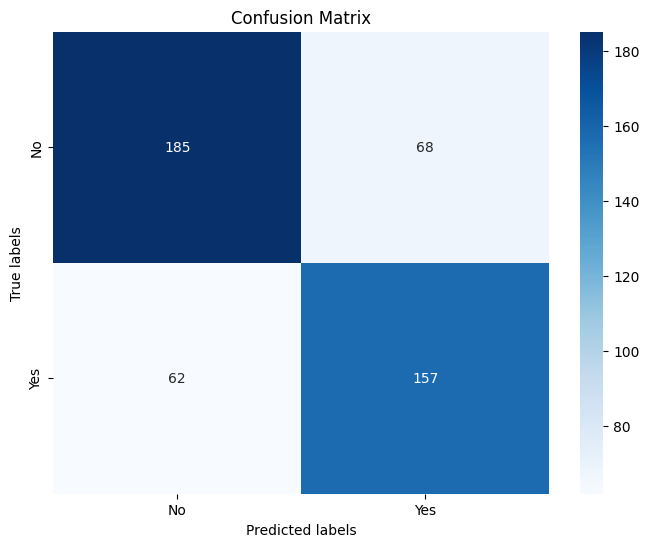

Accuracy: 0.7245762711864406
Precision: 0.6977777777777778
Recall (Sensitivity): 0.7168949771689498
F1-Score: 0.7072072072072072
AUC: 0.77926074322739
Best Hyperparameters: {'C': 0.01}



In [6]:

# Logistic Regression Model
lr_model = LogisticRegression(random_state=125)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='accuracy')
evaluate_model(grid_search_lr, X_train, X_test, y_train, y_test)


Confusion Matrix for GridSearchCV


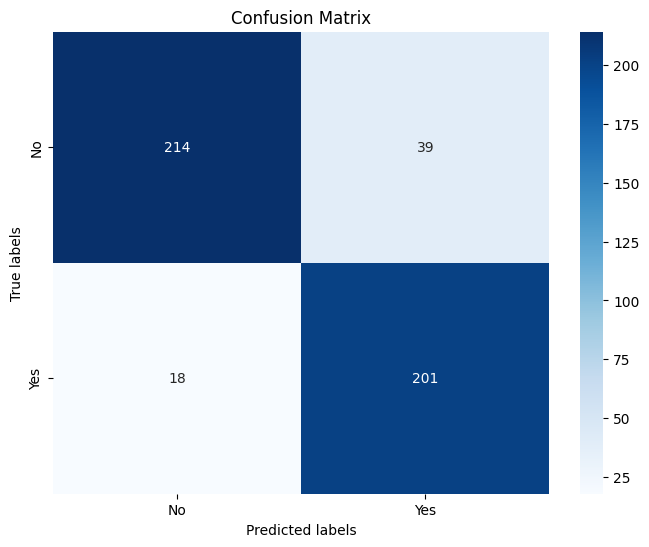

Accuracy: 0.8792372881355932
Precision: 0.8375
Recall (Sensitivity): 0.9178082191780822
F1-Score: 0.8758169934640523
AUC: 0.9374176548089591
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 400}



In [7]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=125)
param_grid_rf = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 4, 10],
    'min_samples_split': [60, 50, 45],
    'min_samples_leaf': [5, 10, 15]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
evaluate_model(grid_search_rf, X_train, X_test, y_train, y_test)

Confusion Matrix for GridSearchCV


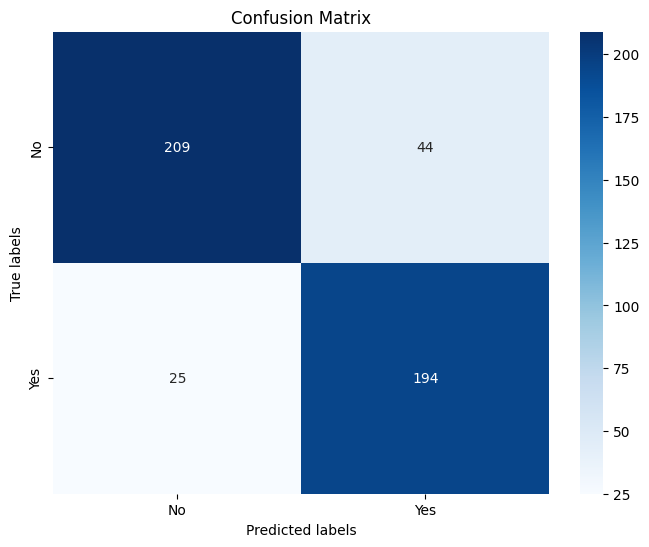

Accuracy: 0.8538135593220338
Precision: 0.8151260504201681
Recall (Sensitivity): 0.8858447488584474
F1-Score: 0.849015317286652
AUC: 0.9120959445557422
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



In [8]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='rbf', probability=True)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
evaluate_model(grid_search_svm, X_train, X_test, y_train, y_test)


Confusion Matrix for GridSearchCV


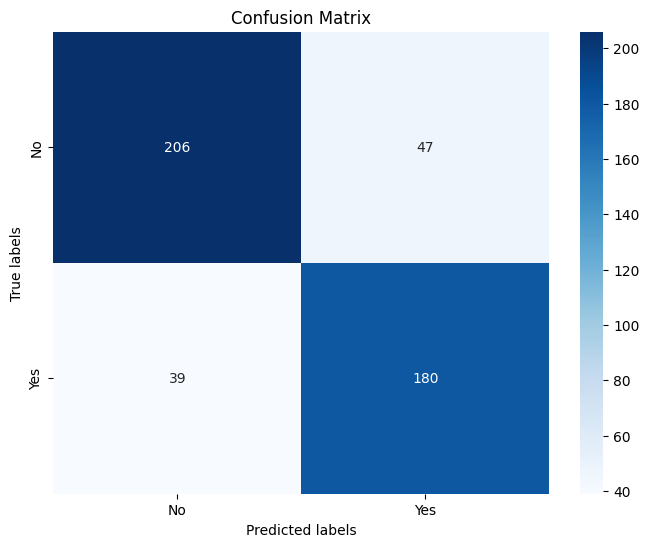

Accuracy: 0.8177966101694916
Precision: 0.7929515418502202
Recall (Sensitivity): 0.821917808219178
F1-Score: 0.8071748878923767
AUC: 0.8491616582742253
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}



In [9]:
# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
evaluate_model(grid_search_knn, X_train, X_test, y_train, y_test)


Confusion Matrix for GridSearchCV


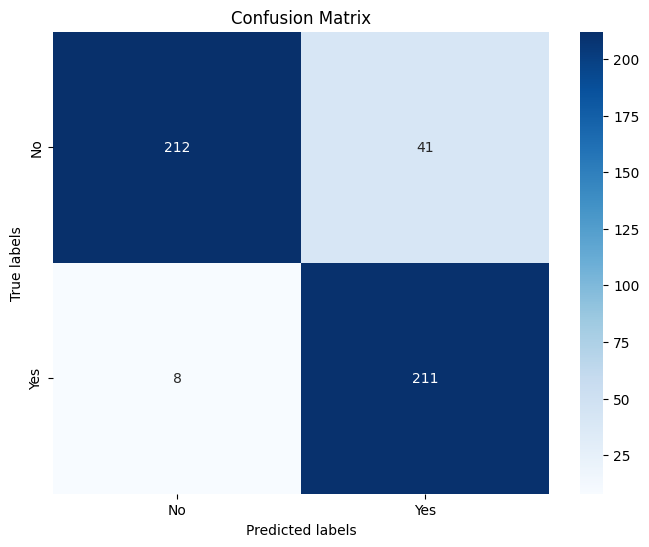

Accuracy: 0.8961864406779662
Precision: 0.8373015873015873
Recall (Sensitivity): 0.9634703196347032
F1-Score: 0.8959660297239915
AUC: 0.9670077788005125
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}



In [13]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=125)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
evaluate_model(grid_search_xgb, X_train, X_test, y_train, y_test)

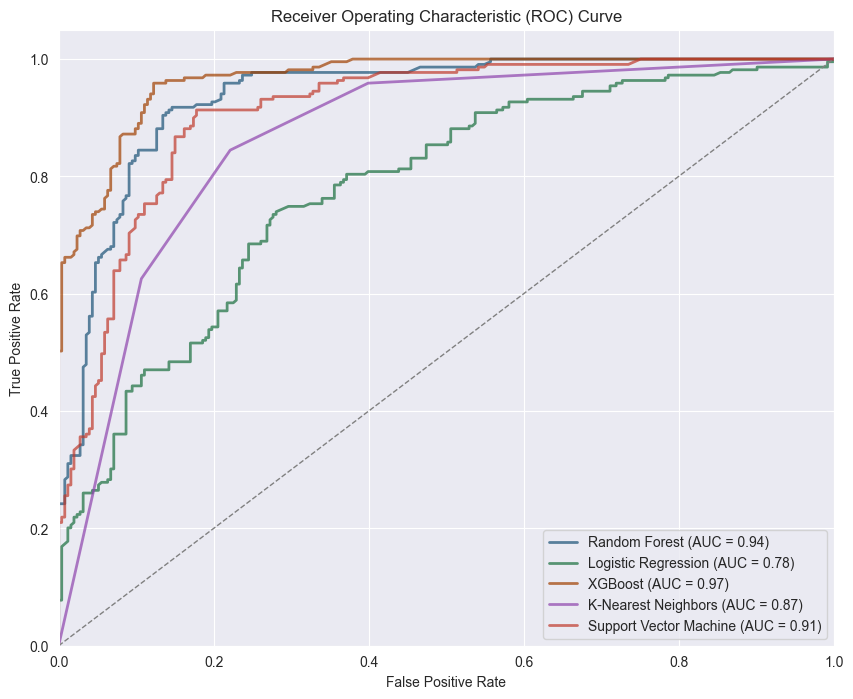

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the best hyperparameters obtained for each model
best_rf_params = {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 50, 'min_samples_leaf': 5}
best_lr_params = {'C': 0.01}
best_xgb_params = {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.8, 'colsample_bytree': 0.6}
best_knn_params = {'n_neighbors': 3, 'weights': 'uniform'}
best_svm_params = {'C': 10, 'kernel': 'rbf'}

# Initialize models with the best hyperparameters
rf_model = RandomForestClassifier(**best_rf_params, random_state=125)
lr_model = LogisticRegression(**best_lr_params, random_state=125)
xgb_model = XGBClassifier(**best_xgb_params, random_state=125)
knn_model = KNeighborsClassifier(**best_knn_params)
svm_model = SVC(**best_svm_params, probability=True, random_state=125)

# Train models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict probabilities and plot ROC curve for each model
plt.figure(figsize=(10, 8))
models = [rf_model, lr_model, xgb_model, knn_model, svm_model]
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost', 'K-Nearest Neighbors', 'Support Vector Machine']
colors = ['#1a5276', '#196f3d', '#a04000', '#8e44ad', '#c0392b']

for i, model in enumerate(models):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, color=colors[i], lw=2, alpha=0.7, linestyle='-', label='%s (AUC = %0.2f)' % (model_names[i], auc))

# Plot settings
sns.set_style("darkgrid")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Store original feature names before encoding
original_feature_names = list(df.columns)
# Feature importance analysis
importances = rf_model.feature_importances_
encoded_feature_names = X.columns  # Use encoded feature names

# Mapping encoded feature importances back to original features
feature_importance_dict = {feature: 0 for feature in original_feature_names if feature != 'Opportunity Status'}
for feature, importance in zip(encoded_feature_names, importances):
    # Find the original feature name (splitting at the first underscore)
    original_feature = feature.split('_')[0]
    if original_feature in feature_importance_dict:
        feature_importance_dict[original_feature] += importance

# Sort feature importances
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plotting feature importances with Seaborn and Matplotlib
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')  # Set Seaborn style for background
plt.title("Feature Importances")
bars = plt.barh(range(len(sorted_feature_importances)), [val for key, val in sorted_feature_importances], color='skyblue')
plt.yticks(range(len(sorted_feature_importances)), [key for key, val in sorted_feature_importances])  # Use horizontal bars
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x')  # Add grid lines

# Add value labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=8)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()